<a href="https://www.kaggle.com/code/monicaghuge/course-proj?scriptVersionId=179971186" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/ai-dataset/Sample_for_AI (1) (1) (1) (1) (1) (1) (2) (1) (1) (4).csv')

# Display the first few rows of the dataset
data.head(5)

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission


In [3]:
data.shape

(9240, 9)

In [4]:
# Drope the customerID column which is not required here.
cols_drop=data.drop(columns=['ID'],inplace=True)


In [5]:
#To check the the information(Non-null) of the dataset ,
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Purchased                    9240 non-null   object 
 1   Do Not Email                 9240 non-null   object 
 2   Do Not Call                  9240 non-null   object 
 3   TotalVisits                  9103 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Page Views Per Visit         9103 non-null   float64
 6   Specialization               5860 non-null   object 
 7   Origin                       9240 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 577.6+ KB


In [6]:
# Summary statistics
data.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [7]:
# Covariance And Correlation
print('Covariance')
display(data.cov(numeric_only=True))

print('n\Correlation')
display(data.corr(numeric_only=True))

Covariance


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,23.569595,585.448146,5.373910
Total Time Spent on Website,585.448146,300327.527522,377.422511
Page Views Per Visit,5.373910,377.422511,4.671727


n\Correlation


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.221240,0.512125
Total Time Spent on Website,0.221240,1.000000,0.320361
Page Views Per Visit,0.512125,0.320361,1.000000


In [8]:
# check the missing values
data.isnull().sum()

Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

In [9]:
data[data['Specialization'].isna()]

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,No,No,No,0.0,0,0.0,NaN,API
1,No,No,No,5.0,674,2.5,NaN,API
4,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission
5,No,No,No,0.0,0,0.0,NaN,API
7,No,No,No,0.0,0,0.0,NaN,API
...,...,...,...,...,...,...,...,...
9208,No,No,No,2.0,181,2.0,NaN,API
9214,Yes,No,No,2.0,881,2.0,NaN,API
9217,No,No,No,0.0,0,0.0,NaN,API
9226,No,No,No,0.0,0,0.0,NaN,API


In [10]:
# Impute missing values in numerical columns
numerical_cols = ['TotalVisits', 'Page Views Per Visit']
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Option 1: Fill with the most frequent value (mode)
data['Specialization'].fillna(data['Specialization'].mode()[0],inplace=True)


# Verify that there are no missing values left
print(data.isnull().sum())

Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64


In [11]:
data.head(5)

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,No,No,No,0.0,0,0.0,Finance Management,API
1,No,No,No,5.0,674,2.5,Finance Management,API
2,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,Yes,No,No,2.0,1428,1.0,Finance Management,Landing Page Submission


In [13]:
data_nums=['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
print(data_nums)

data_cols=['Do Not Email','Do Not Call','Specialization','Origin']
print(data_cols)


['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
['Do Not Email', 'Do Not Call', 'Specialization', 'Origin']


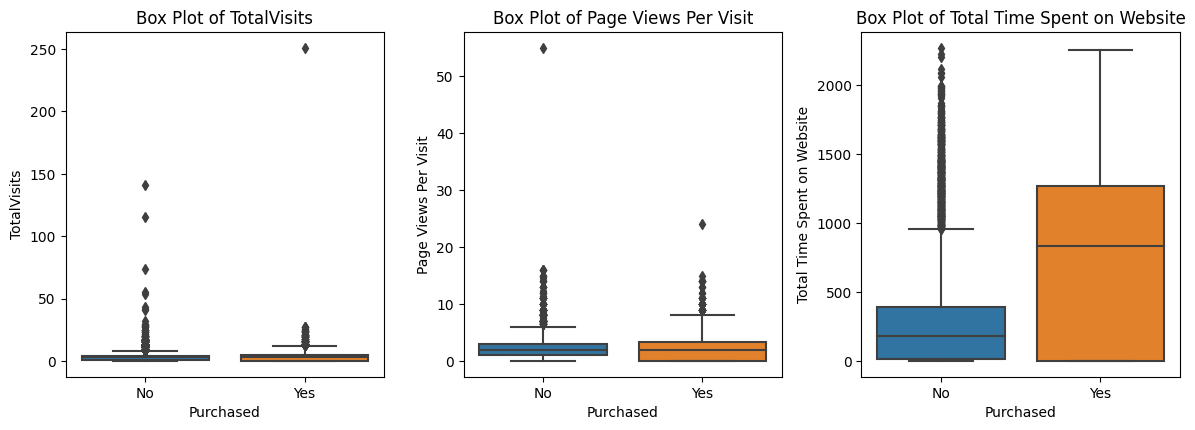

In [14]:
features = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
target = 'Purchased'
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Purchased', y=col, data=data)
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Purchased')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [16]:
Q1 = data['Total Time Spent on Website'].quantile(0.25)
Q3 = data['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Identify outliers
outliers = data[(data['Total Time Spent on Website'] < lower_bound) | (data['Total Time Spent on Website'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')

data= data[(data['Total Time Spent on Website'] >= lower_bound) & (data['Total Time Spent on Website'] <= upper_bound)]

Number of outliers: 0


In [18]:
Q1 = data['TotalVisits'].quantile(0.25)
Q3 = data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Identify outliers
outliers = data[(data['TotalVisits'] < lower_bound) | (data['TotalVisits'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')

data= data[(data['TotalVisits'] >= lower_bound) & (data['TotalVisits'] <= upper_bound)]

Number of outliers: 267


In [20]:
Q1 = data['Page Views Per Visit'].quantile(0.25)
Q3 = data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Identify outliers
outliers = data[(data['Page Views Per Visit'] < lower_bound) | (data['Page Views Per Visit'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')

data = data[(data['Page Views Per Visit'] >= lower_bound) & (data['Page Views Per Visit'] <= upper_bound)]

Number of outliers: 294


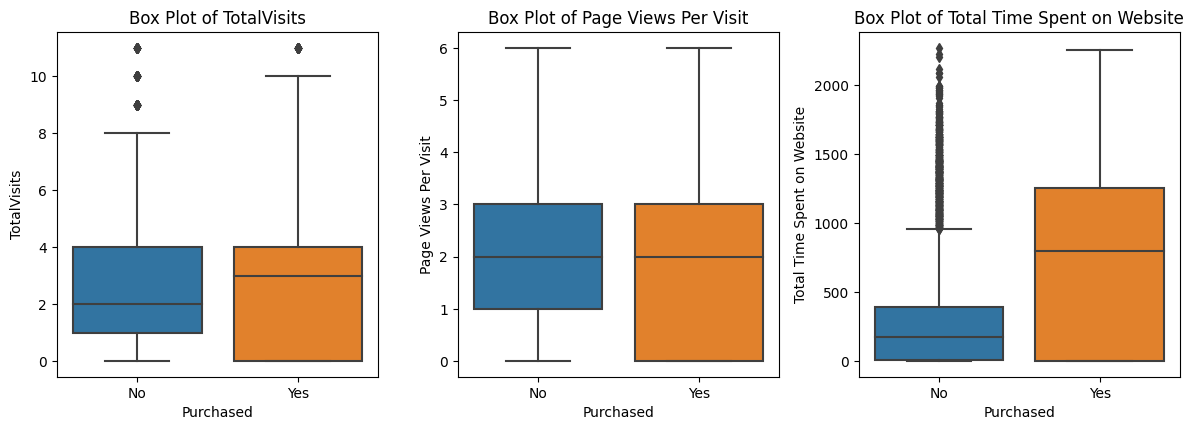

In [22]:
features = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
target = 'Purchased'
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Purchased', y=col, data=data)
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Purchased')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

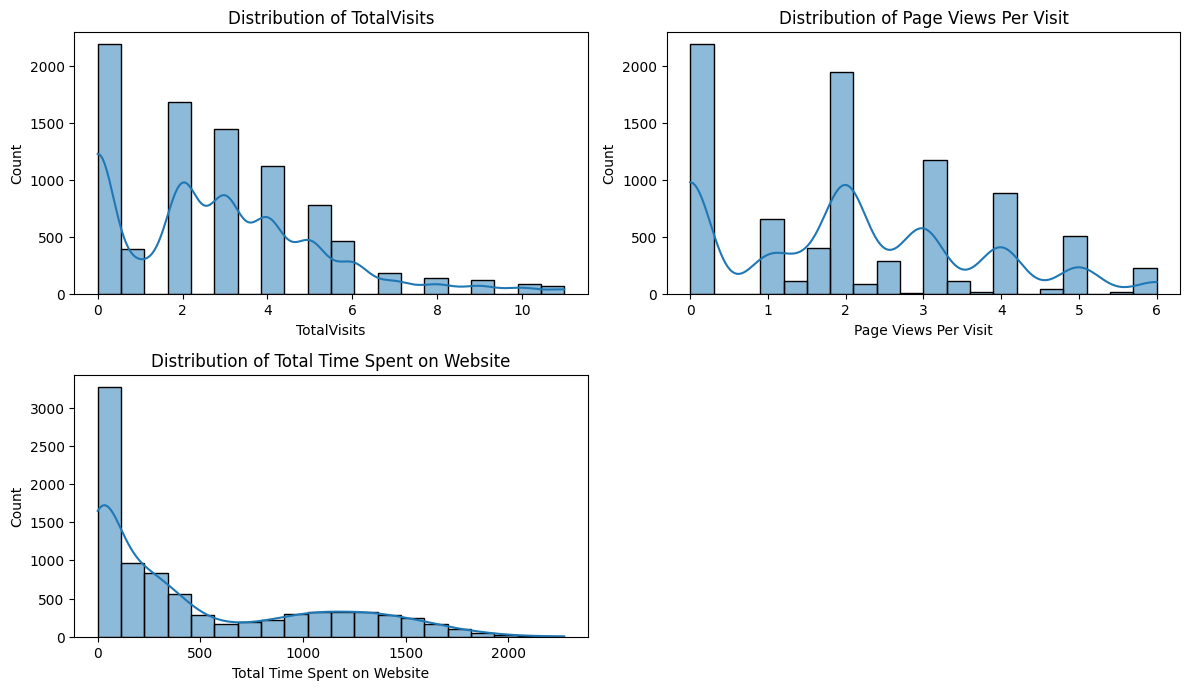

In [23]:
# Visualize the distribution of numerical features

plt.figure(figsize=(12, 10))
for i, col in enumerate(data_nums, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

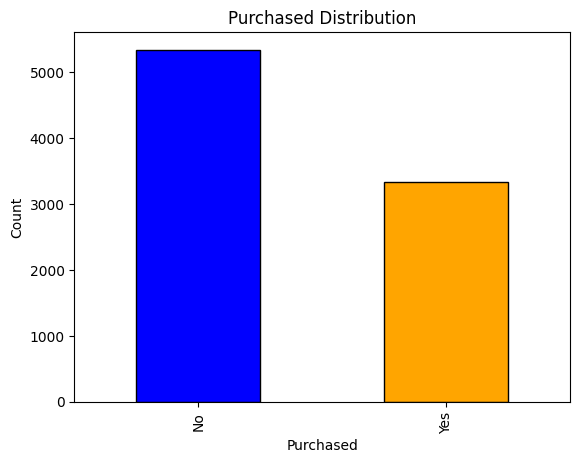

In [24]:
# Barplot for distribution of churn and retain
Purchased_counts = data['Purchased'].value_counts()

Purchased_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Purchased Distribution')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [25]:
# check the value counts of target variable
data['Purchased'].value_counts()*100/len(data['Purchased'])

Purchased
No     61.60848
Yes    38.39152
Name: count, dtype: float64

* So we can clearly see there is imbalance dataset so we can simply do resampling or use other methods to over come this imbaling nature of dataset
* So the ratio of imbalance dataset is about 60 : 40 so we can handle these imbalance nature without doing resampling method.
* BY simply using Stratified splitting method and avoiding use of Accuracy classification metrics

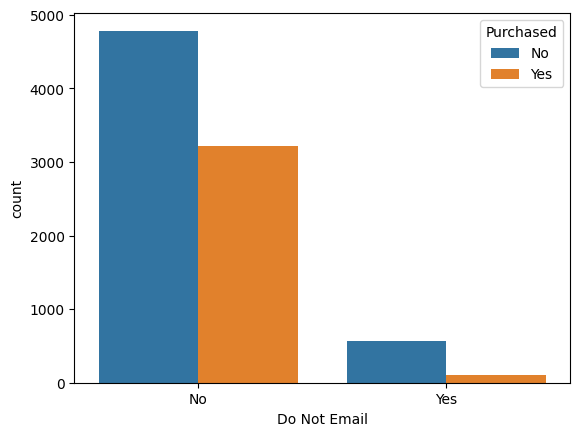

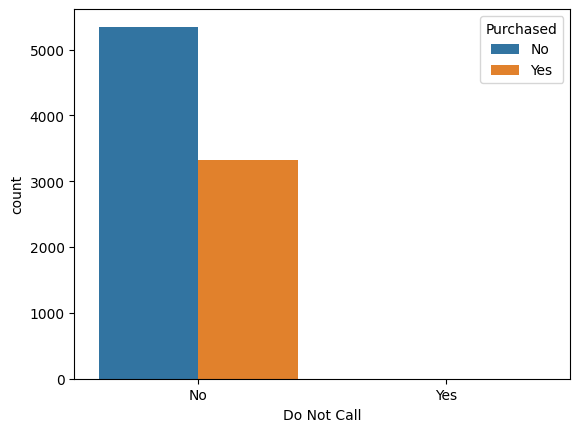

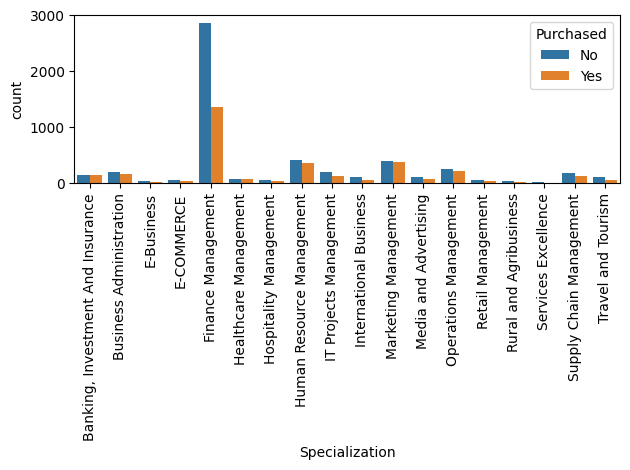

In [26]:
sns.barplot(data=data[['Purchased', 'Do Not Email']].value_counts(sort=False).to_frame().reset_index(), 
            x='Do Not Email', y='count', hue='Purchased')
plt.show()

sns.barplot(data=data[['Purchased', 'Do Not Call']].value_counts(sort=False).to_frame().reset_index(), 
            x='Do Not Call', y='count', hue='Purchased')
plt.show()

sns.barplot(data=data[['Purchased', 'Specialization']].value_counts(sort=False).to_frame().reset_index(), 
            x='Specialization', y='count', hue='Purchased')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()



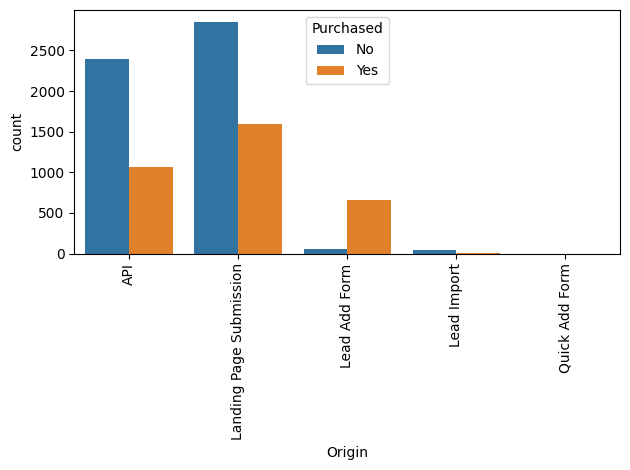

In [27]:
sns.barplot(data=data[['Purchased', 'Origin']].value_counts(sort=False).to_frame().reset_index(), 
            x='Origin', y='count', hue='Purchased')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**Value counts of features**

In [28]:
data['Specialization'].value_counts()

Specialization
Finance Management                   4215
Marketing Management                  789
Human Resource Management             780
Operations Management                 477
Business Administration               371
IT Projects Management                339
Supply Chain Management               317
Banking, Investment And Insurance     296
Media and Advertising                 184
Travel and Tourism                    166
International Business                164
Healthcare Management                 139
Hospitality Management                106
E-COMMERCE                             98
Retail Management                      88
Rural and Agribusiness                 62
E-Business                             52
Services Excellence                    36
Name: count, dtype: int64

In [29]:
data['Do Not Email'].value_counts()

Do Not Email
No     8008
Yes     671
Name: count, dtype: int64

In [30]:
data['Do Not Call'].value_counts()

Do Not Call
No     8677
Yes       2
Name: count, dtype: int64

In [31]:
data['Origin'].value_counts()

Origin
Landing Page Submission    4453
API                        3458
Lead Add Form               713
Lead Import                  54
Quick Add Form                1
Name: count, dtype: int64

In [32]:
# let's check unique values in dataset
for i in data.columns:
    print("unique val : ",i ,data[i].nunique())

unique val :  Purchased 2
unique val :  Do Not Email 2
unique val :  Do Not Call 2
unique val :  TotalVisits 12
unique val :  Total Time Spent on Website 1698
unique val :  Page Views Per Visit 34
unique val :  Specialization 18
unique val :  Origin 5


**Encoding for target varible**

In [33]:
# Initialize the LabelEncoder
label_enc = LabelEncoder()
# Fit and transform the "Purchased" column
data['Purchased'] = label_enc.fit_transform(data['Purchased'])
# Check the Purchased after encoding
data['Purchased']

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Purchased, Length: 8679, dtype: int64

In [34]:
# Initialize the LabelEncoder
label_enc = LabelEncoder()
# Fit and transform the "Purchased" column
data['Purchased'] = label_enc.fit_transform(data['Purchased'])
# Check the Purchased after encoding
data['Purchased']

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Purchased, Length: 8679, dtype: int64

In [35]:
# Initialize the LabelEncoder
label_enc = LabelEncoder()
# Fit and transform the "Purchased" column
data['Do Not Email'] = label_enc.fit_transform(data['Do Not Email'])
# Check the Purchased after encoding
data['Do Not Email']

0       0
1       0
2       0
3       0
4       0
       ..
9235    1
9236    0
9237    1
9238    0
9239    0
Name: Do Not Email, Length: 8679, dtype: int64

In [36]:
# Initialize the LabelEncoder
label_enc = LabelEncoder()
# Fit and transform the "Purchased" column
data['Do Not Call'] = label_enc.fit_transform(data['Do Not Call'])
# Check the Purchased after encoding
data['Do Not Call']

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Name: Do Not Call, Length: 8679, dtype: int64

In [37]:
# Columns to be one-hot encoded
columns_to_encode = ['Specialization', 'Origin']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(data[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original columns)
data_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

print(data_encoded)

      Purchased  Do Not Email  Do Not Call  TotalVisits  \
0           0.0           0.0          0.0          0.0   
1           0.0           0.0          0.0          5.0   
2           1.0           0.0          0.0          2.0   
3           0.0           0.0          0.0          1.0   
4           1.0           0.0          0.0          2.0   
...         ...           ...          ...          ...   
8624        NaN           NaN          NaN          NaN   
8640        NaN           NaN          NaN          NaN   
8649        NaN           NaN          NaN          NaN   
8659        NaN           NaN          NaN          NaN   
8678        NaN           NaN          NaN          NaN   

      Total Time Spent on Website  Page Views Per Visit  \
0                             0.0                   0.0   
1                           674.0                   2.5   
2                          1532.0                   2.0   
3                           305.0                   1.0

**Scaling**

In [38]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[data_nums] = scaler.fit_transform(data[data_nums])
data[data_nums]

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
0,0.000000,0.000000,0.000000
1,0.454545,0.416667,0.296655
2,0.181818,0.333333,0.674296
3,0.090909,0.166667,0.134243
4,0.181818,0.166667,0.628521
...,...,...,...
9235,0.727273,0.445000,0.812060
9236,0.181818,0.333333,0.104754
9237,0.181818,0.333333,0.087588
9238,0.272727,0.500000,0.219630


**Data Splitting**

In [39]:
X = data.drop(columns=['Purchased'])  # Drop the 'Purchased' column to get the feature matrix X
y = data['Purchased']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('shape of X',X_train.shape)
print('shape of y',y_train.shape)
print('shape of X',X_test.shape)
print('shape of y',y_test.shape)

shape of X (6943, 7)
shape of y (6943,)
shape of X (1736, 7)
shape of y (1736,)


**Model Building**

In [41]:
#defining categorical and numerical features
categorical_features=['Do Not Email','Do Not Call','Specialization','Origin']
numerical_features=['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

In [42]:
#preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())])

#preprocessing for categorical data
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown ='ignore'))])

preprocessor= ColumnTransformer(
    transformers=[
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,numerical_features)])

preprocessor 

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['TotalVisits', 'Page Views Per Visit',
                                  'Total Time Spent on Website']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['TotalVisits', 'Page Views Per Visit',
                                  'Total Time Spent on Website'])])

In [43]:
# Define the evaluation metrics
scoring = [ 'precision', 'recall', 'f1']

classifiers = [
    ('Log_Reg', LogisticRegression()),
    ('RF_Classifier', RandomForestClassifier()),
    ('SVM', SVC())
]

for classifier_name, classifier in classifiers:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Perform cross-validation on the training data
    cv_results = cross_validate(model, X_train, y_train, cv=4, scoring=scoring)
    
    print(classifier_name)
    #print("Cross-Validation Scores:")
    print("  Precision:", cv_results['test_precision'])
    print("  Recall:", cv_results['test_recall'])
    print("  F1 Score:", cv_results['test_f1'])
    
    
    
    

Log_Reg
  Precision: [0.67667436 0.7016317  0.68707483 0.7424594 ]
  Recall: [0.43993994 0.45127436 0.45427286 0.48048048]
  F1 Score: [0.53321201 0.54927007 0.54693141 0.5834093 ]
RF_Classifier
  Precision: [0.64023211 0.6705653  0.67594433 0.6993865 ]
  Recall: [0.496997   0.51574213 0.50974513 0.51351351]
  F1 Score: [0.55959425 0.58305085 0.58119658 0.59220779]
SVM
  Precision: [0.67561983 0.71189979 0.70204082 0.724846  ]
  Recall: [0.49099099 0.51124438 0.51574213 0.53003003]
  F1 Score: [0.56869565 0.59511344 0.59464131 0.6123157 ]


In [46]:
# Define the evaluation metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Define hyperparameter grids for each classifier
param_grids = {
    'Log_Reg': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'RF_Classifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf']
    }
}

classifiers = [
    ('Log_Reg', LogisticRegression()),
    ('RF_Classifier', RandomForestClassifier()),
    ('SVM', SVC())
]

for classifier_name, classifier in classifiers:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    param_grid = param_grids[classifier_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring=scoring, refit='f1')
    grid_search.fit(X_train, y_train)
    
    print(f"Best param for {classifier_name}: {grid_search.best_params_}")
    print(f"Best CV F1_score for {classifier_name}: {grid_search.best_score_}")

    cv_results = grid_search.cv_results_
    for metric in scoring.keys():
        mean_score = cv_results[f'mean_test_{metric}']
        std_score = cv_results[f'std_test_{metric}']
        print(f"  {metric.capitalize()}: {mean_score.mean():.2f}")

Best param for Log_Reg: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV F1_score for Log_Reg: 0.5532056974849111
  Precision: 0.68
  Recall: 0.44
  F1: 0.54
Best param for RF_Classifier: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best CV F1_score for RF_Classifier: 0.582119585782999
  Precision: 0.72
  Recall: 0.30
  F1: 0.37
Best param for SVM: {'classifier__C': 1.0, 'classifier__kernel': 'rbf'}
Best CV F1_score for SVM: 0.5926915255350975
  Precision: 0.68
  Recall: 0.48
  F1: 0.56
